In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Epoch :  0 cost :  1.0872625 weights :  0.17215814 biases :  -0.1154077
Epoch :  200 cost :  0.10677949 weights :  0.34958768 biases :  0.104360245
Epoch :  400 cost :  0.09529262 weights :  0.32846314 biases :  0.25412372
Epoch :  600 cost :  0.08822603 weights :  0.31189436 biases :  0.37158912
Epoch :  800 cost :  0.08387874 weights :  0.29889876 biases :  0.4637219
Epoch :  1000 cost :  0.081204355 weights :  0.28870586 biases :  0.5359852
Epoch :  1200 cost :  0.07955909 weights :  0.2807111 biases :  0.59266406
Epoch :  1400 cost :  0.07854695 weights :  0.2744406 biases :  0.63711953
Epoch :  1600 cost :  0.07792426 weights :  0.26952228 biases :  0.671988
Epoch :  1800 cost :  0.077541225 weights :  0.26566473 biases :  0.69933635
optimizer finished
Final traing cost :  0.077306494 weights :  0.2626524 bias :  0.7206924


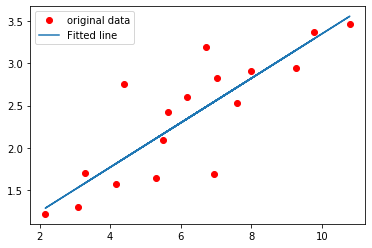

Testing cost 0.035985343
Absolute difference 0.04132115


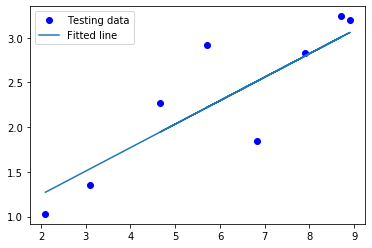

In [11]:
#training data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 

#testing data
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_Y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

#inputs and targets
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#weights and bias
W = tf.Variable(np.random.randn(),name='weights')
b = tf.Variable(np.random.randn(),name = 'bias')

lr = 0.01
training_epochs = 2000
display_step = 200
n_samples = train_X.shape[0]


#model 
linear_model = W*X+b

#mean_squared_error
cost = tf.reduce_sum(tf.square(linear_model - Y)) / (2*n_samples)

#optimizer
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost)

#initializing variables
init = tf.global_variables_initializer()

#creating session

sess = tf.Session()
sess.run(init)


for epoch in range(training_epochs):
    sess.run(optimizer,feed_dict = {X:train_X,Y:train_Y})
    
    if epoch % display_step == 0:
        c = sess.run(cost,feed_dict = {X:train_X,Y:train_Y})
        print("Epoch : ",epoch,"cost : ",c,"weights : ",sess.run(W),"biases : ",sess.run(b))
        
print("optimizer finished")
training_cost =  sess.run(cost,feed_dict = {X:train_X,Y:train_Y})
print("Final traing cost : ",training_cost,"weights : ",sess.run(W),"bias : ",sess.run(b))


#visualization for original data

plt.plot(train_X,train_Y,'ro',label = "original data")
plt.plot(train_X,sess.run(W)*train_X+sess.run(b),label = 'Fitted line')
plt.legend()
plt.show()


#testing model
n_samples1 = test_X.shape[0]
cost1 = tf.reduce_sum(tf.square(linear_model - Y))/(2*n_samples1)
testing_cost = sess.run(cost,feed_dict = {X:test_X,Y:test_Y})
print("Testing cost",testing_cost)

#absolute difference
print("Absolute difference",abs(training_cost - testing_cost))


plt.plot(test_X,test_Y,'bo',label = 'Testing data')
plt.plot(test_X,sess.run(W)*test_X+sess.run(b),label = 'Fitted line')
plt.legend()
plt.show()

